# Health Report Anomaly Detector: Cluster-Based Insights into Abnormalities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("anomaly_detect.xlsx", engine="openpyxl")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [5]:
df.shape

(70000, 13)

In [6]:
df["gender"] = df["gender"].map({1: 0, 2: 1})
multi_cat_cols = ["cholesterol", "gluc"]
df = pd.get_dummies(df, columns=multi_cat_cols, prefix=multi_cat_cols)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,0,18393,1,168,62.0,110,80,0,0,1,0,True,False,False,True,False,False
1,1,20228,0,156,85.0,140,90,0,0,1,1,False,False,True,True,False,False
2,2,18857,0,165,64.0,130,70,0,0,0,1,False,False,True,True,False,False
3,3,17623,1,169,82.0,150,100,0,0,1,1,True,False,False,True,False,False
4,4,17474,0,156,56.0,100,60,0,0,0,0,True,False,False,True,False,False


In [7]:
df['age']=(df['age']/365).round().astype(int)
df.drop(columns=['id','cardio'])

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,50,1,168,62.0,110,80,0,0,1,True,False,False,True,False,False
1,55,0,156,85.0,140,90,0,0,1,False,False,True,True,False,False
2,52,0,165,64.0,130,70,0,0,0,False,False,True,True,False,False
3,48,1,169,82.0,150,100,0,0,1,True,False,False,True,False,False
4,48,0,156,56.0,100,60,0,0,0,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,1,168,76.0,120,80,1,0,1,True,False,False,True,False,False
69996,62,0,158,126.0,140,90,0,0,1,False,True,False,False,True,False
69997,52,1,183,105.0,180,90,0,1,0,False,False,True,True,False,False
69998,61,0,163,72.0,135,80,0,0,0,True,False,False,False,True,False


In [8]:
df.dtypes

id                 int64
age                int64
gender             int64
height             int64
weight           float64
ap_hi              int64
ap_lo              int64
smoke              int64
alco               int64
active             int64
cardio             int64
cholesterol_1       bool
cholesterol_2       bool
cholesterol_3       bool
gluc_1              bool
gluc_2              bool
gluc_3              bool
dtype: object

In [9]:
for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

In [10]:
df["BMI"] = df["weight"]/((df["height"]/100)**2)

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,BMI
0,0,50,1,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0,21.967120
1,1,55,0,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0,34.927679
2,2,52,0,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0,23.507805
3,3,48,1,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0,28.710479
4,4,48,0,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0,23.011177


In [12]:
df["gender"].unique()

array([1, 0])

In [13]:
df["gender"].value_counts()

gender
0    45530
1    24470
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

df_scaling=df.copy()
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df_scaling)

In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             70000 non-null  int64  
 1   age            70000 non-null  int64  
 2   gender         70000 non-null  int64  
 3   height         70000 non-null  int64  
 4   weight         70000 non-null  float64
 5   ap_hi          70000 non-null  int64  
 6   ap_lo          70000 non-null  int64  
 7   smoke          70000 non-null  int64  
 8   alco           70000 non-null  int64  
 9   active         70000 non-null  int64  
 10  cardio         70000 non-null  int64  
 11  cholesterol_1  70000 non-null  int64  
 12  cholesterol_2  70000 non-null  int64  
 13  cholesterol_3  70000 non-null  int64  
 14  gluc_1         70000 non-null  int64  
 15  gluc_2         70000 non-null  int64  
 16  gluc_3         70000 non-null  int64  
 17  BMI            70000 non-null  float64
dtypes: flo

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,0.349571,164.359229,74.205690,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700,0.748357,0.136414,0.115229,0.849700,0.074143,0.076157,27.556513
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003,0.433960,0.343230,0.319300,0.357368,0.262005,0.265251,6.091511
min,0.000000,30.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,23.875115
50%,50001.500000,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,26.374068
75%,74889.250000,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,30.222222
max,99999.000000,65.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298.666667


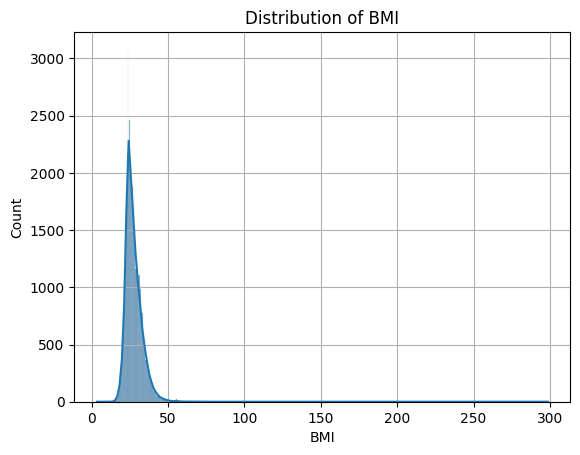

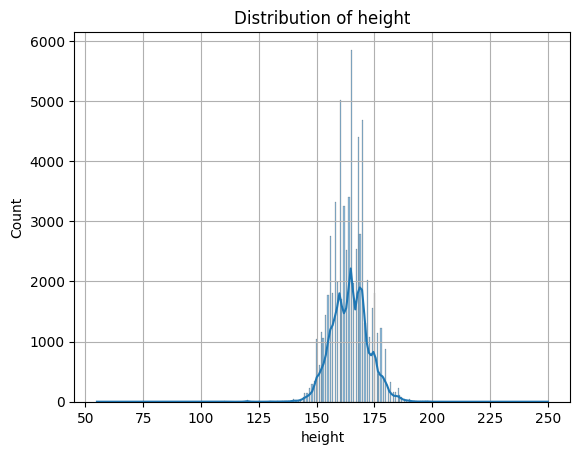

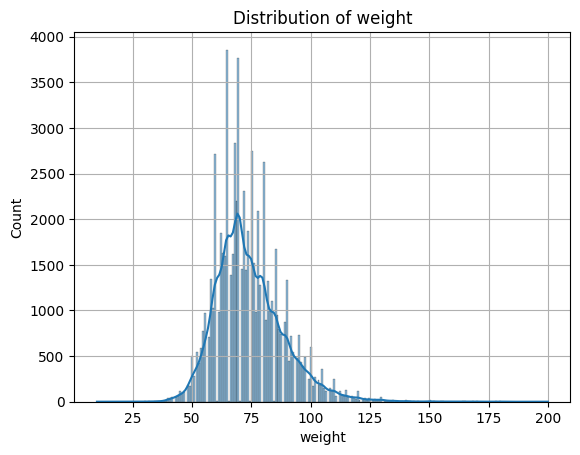

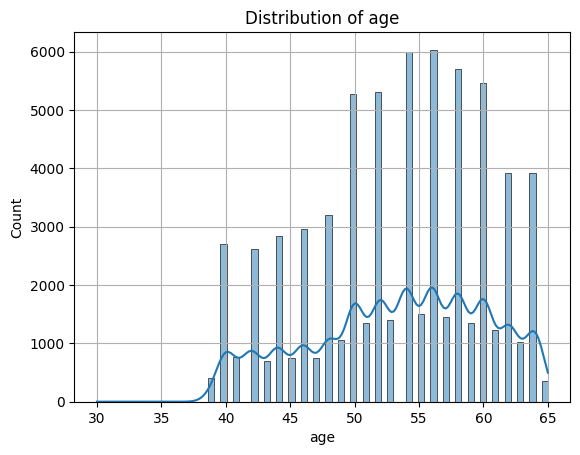

In [16]:
cols=['BMI','height','weight','age']

for col in cols:
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

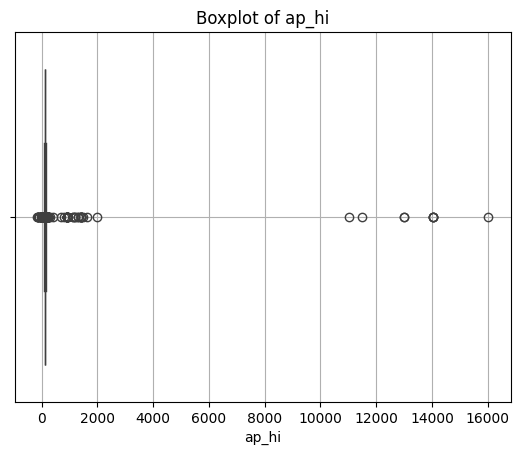

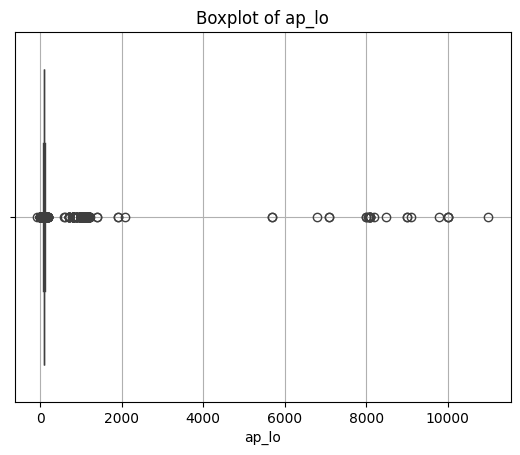

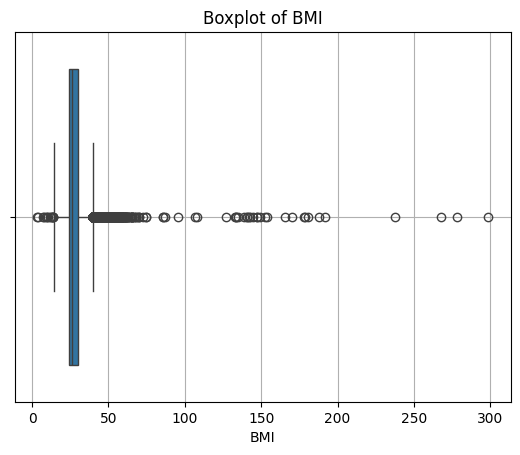

In [17]:
for col in ['ap_hi','ap_lo','BMI']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

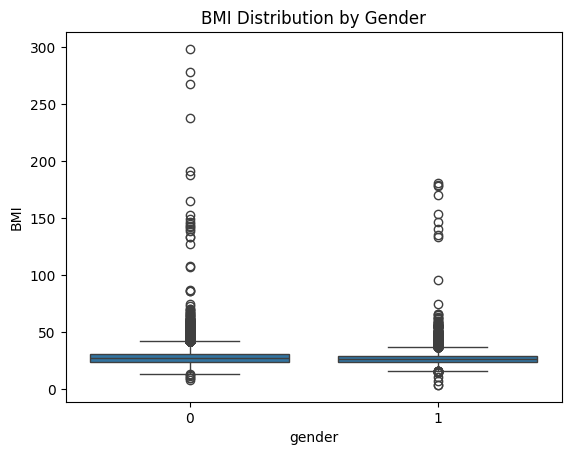

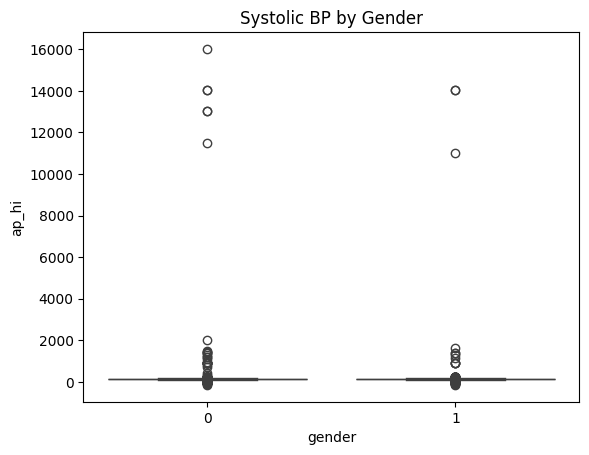

In [18]:
sns.boxplot(x='gender', y='BMI', data=df)
plt.title("BMI Distribution by Gender")
plt.show()

sns.boxplot(x='gender', y='ap_hi', data=df)
plt.title("Systolic BP by Gender")
plt.show()

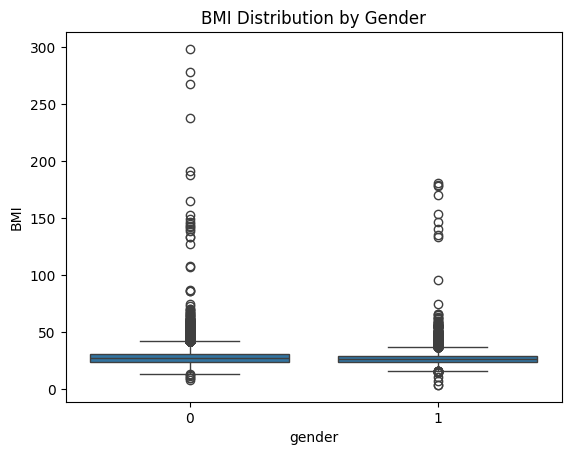

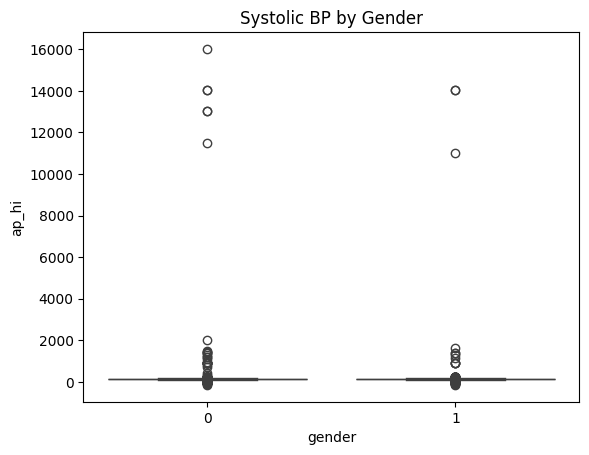

In [19]:
sns.boxplot(x='gender',y='BMI',data=df)
plt.title("BMI Distribution by Gender")
plt.show()

sns.boxplot(x='gender',y='ap_hi',data=df)
plt.title("Systolic BP by Gender")
plt.show()

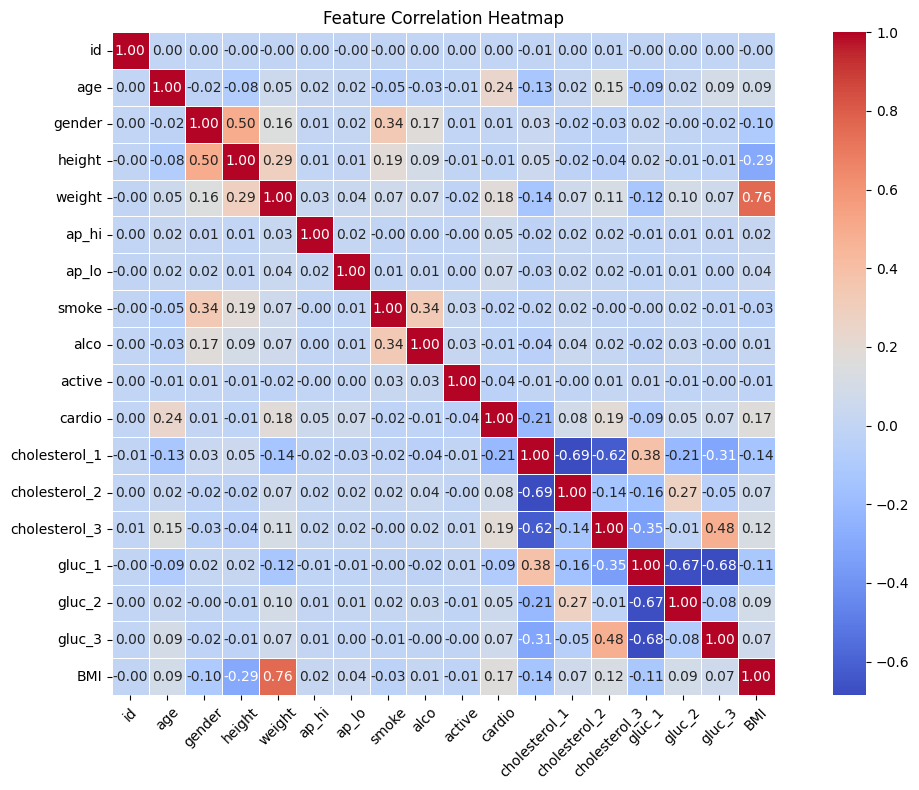

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5,square=True)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### We will keep BMI, drop weight for clustering to avoid redundancy ,
#### Convert one-hot cholesterol_* and gluc_* back to single column

In [21]:
df['cholesterol_level'] = df[['cholesterol_1', 'cholesterol_2', 'cholesterol_3']].idxmax(axis=1)
df['cholesterol_level'] = df['cholesterol_level'].str.extract(r'(\d)').astype(int)

In [22]:
df['gluc_level'] = df[['gluc_1', 'gluc_2', 'gluc_3']].idxmax(axis=1)
df['gluc_level'] = df['gluc_level'].str.extract(r"(\d)").astype(int)

In [23]:
df.drop(columns=["cholesterol_1", "cholesterol_2", "cholesterol_3","gluc_1", "gluc_2", "gluc_3"], inplace=True)

In [24]:
df.drop(columns=['id','cardio'],inplace=True)

In [25]:
df.drop(columns='weight',inplace=True)

In [26]:
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level
0,50,1,168,110,80,0,0,1,21.967120,1,1
1,55,0,156,140,90,0,0,1,34.927679,3,1
2,52,0,165,130,70,0,0,0,23.507805,3,1
3,48,1,169,150,100,0,0,1,28.710479,1,1
4,48,0,156,100,60,0,0,0,23.011177,1,1


Dataset is now ready sowe will begin applying anomaly detection

In [27]:
from sklearn.preprocessing import StandardScaler

features=['age','gender','height','ap_hi','ap_lo','smoke','alco','active','BMI','cholesterol_level','gluc_level']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df[features])

In [28]:
from sklearn.ensemble import IsolationForest
iso_for= IsolationForest( contamination=0.05 ,random_state=42)
df['anomaly']=iso_for.fit_predict(x_scaled)
df['anomaly']=df['anomaly'].map({1:0,-1:1})   # 1=anomality
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level,anomaly
0,50,1,168,110,80,0,0,1,21.967120,1,1,0
1,55,0,156,140,90,0,0,1,34.927679,3,1,0
2,52,0,165,130,70,0,0,0,23.507805,3,1,0
3,48,1,169,150,100,0,0,1,28.710479,1,1,0
4,48,0,156,100,60,0,0,0,23.011177,1,1,0


In [29]:
df['anomaly'].value_counts()

anomaly
0    66500
1     3500
Name: count, dtype: int64

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# Add PCA columns to DataFrame
df["pca_1"] = X_pca[:, 0]
df["pca_2"] = X_pca[:, 1]


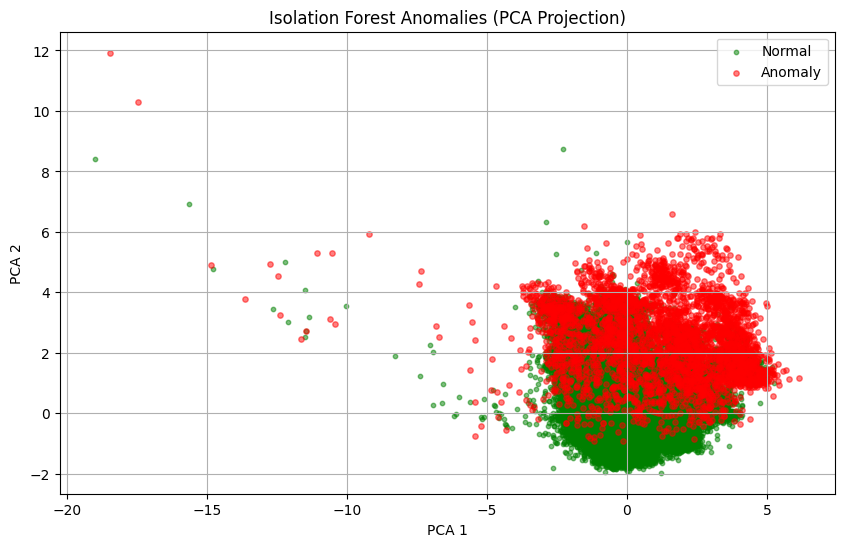

In [31]:
plt.figure(figsize=(10, 6))

# Normal points
plt.scatter(df[df["anomaly"] == 0]["pca_1"],
            df[df["anomaly"] == 0]["pca_2"],
            c='green', label="Normal", alpha=0.5, s=10)

# Anomalies
plt.scatter(df[df["anomaly"] == 1]["pca_1"],
            df[df["anomaly"] == 1]["pca_2"],
            c='red', label="Anomaly", alpha=0.5, s=15)

plt.title("Isolation Forest Anomalies (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

=> Many anomalies sit on the edges or around the dense cluster


=> Overlapping visually with some normal points

In [32]:
# Now we will make a rule-based messaging function to tell person reason for the anomaly
def explain_anomaly(row):
    reasons = []
    
    if row['BMI'] > 30:
        reasons.append("High BMI (possible obesity)")
    if row['cholesterol_level'] > 1:
        reasons.append("High cholesterol level")
    if row['gluc_level'] > 1:
        reasons.append("High glucose level")
    if row['ap_hi'] > 140:
        reasons.append("High systolic BP")
    if row['ap_lo'] > 90:
        reasons.append("High diastolic BP")
    if row['smoke'] == 1:
        reasons.append("Smoker")
    if row['alco'] == 1:
        reasons.append("Alcohol consumption")
    if row['active'] == 0:
        reasons.append("Physically inactive")

    return reasons

df["anomaly_reason"] = df.apply(explain_anomaly, axis=1)

df["anomaly_reason"] = df["anomaly_reason"].apply(lambda x: x if x else ["No risk factors detected"])

In [33]:
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level,anomaly,pca_1,pca_2,anomaly_reason
0,50,1,168,110,80,0,0,1,21.967120,1,1,0,1.278694,-0.784040,[No risk factors detected]
1,55,0,156,140,90,0,0,1,34.927679,3,1,0,-1.880998,1.263127,"[High BMI (possible obesity), High cholesterol..."
2,52,0,165,130,70,0,0,0,23.507805,3,1,0,-0.757394,0.696001,"[High cholesterol level, Physically inactive]"
3,48,1,169,150,100,0,0,1,28.710479,1,1,0,1.068212,-0.560926,"[High systolic BP, High diastolic BP]"
4,48,0,156,100,60,0,0,0,23.011177,1,1,0,-0.668739,-1.330211,[Physically inactive]


In [55]:
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level,anomaly,pca_1,pca_2,anomaly_reason
0,50,1,168,110,80,0,0,1,21.967120,1,1,0,1.278694,-0.784040,[No risk factors detected]
1,55,0,156,140,90,0,0,1,34.927679,3,1,0,-1.880998,1.263127,"[High BMI (possible obesity), High cholesterol..."
2,52,0,165,130,70,0,0,0,23.507805,3,1,0,-0.757394,0.696001,"[High cholesterol level, Physically inactive]"
3,48,1,169,150,100,0,0,1,28.710479,1,1,0,1.068212,-0.560926,"[High systolic BP, High diastolic BP]"
4,48,0,156,100,60,0,0,0,23.011177,1,1,0,-0.668739,-1.330211,[Physically inactive]


In [38]:
df.rename(columns={'anomaly': 'anomaly_flag'}, inplace=True)
df['anomaly_risks'] = df['anomaly_flag'].map({1: "High anomaly chance", 0: "No / Low anomaly chance / Prone to health risk"})
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level,anomaly_flag,pca_1,pca_2,anomaly_reason,anomaly_risks
0,50,1,168,110,80,0,0,1,21.967120,1,1,0,1.278694,-0.784040,[No risk factors detected],No / Low anomaly chance / Prone to health risk
1,55,0,156,140,90,0,0,1,34.927679,3,1,0,-1.880998,1.263127,"[High BMI (possible obesity), High cholesterol...",No / Low anomaly chance / Prone to health risk
2,52,0,165,130,70,0,0,0,23.507805,3,1,0,-0.757394,0.696001,"[High cholesterol level, Physically inactive]",No / Low anomaly chance / Prone to health risk
3,48,1,169,150,100,0,0,1,28.710479,1,1,0,1.068212,-0.560926,"[High systolic BP, High diastolic BP]",No / Low anomaly chance / Prone to health risk
4,48,0,156,100,60,0,0,0,23.011177,1,1,0,-0.668739,-1.330211,[Physically inactive],No / Low anomaly chance / Prone to health risk


In [39]:
df['anomaly_risks'].value_counts()

anomaly_risks
No / Low anomaly chance / Prone to health risk    66500
High anomaly chance                                3500
Name: count, dtype: int64

In [40]:
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level,anomaly_flag,pca_1,pca_2,anomaly_reason,anomaly_risks
0,50,1,168,110,80,0,0,1,21.967120,1,1,0,1.278694,-0.784040,[No risk factors detected],No / Low anomaly chance / Prone to health risk
1,55,0,156,140,90,0,0,1,34.927679,3,1,0,-1.880998,1.263127,"[High BMI (possible obesity), High cholesterol...",No / Low anomaly chance / Prone to health risk
2,52,0,165,130,70,0,0,0,23.507805,3,1,0,-0.757394,0.696001,"[High cholesterol level, Physically inactive]",No / Low anomaly chance / Prone to health risk
3,48,1,169,150,100,0,0,1,28.710479,1,1,0,1.068212,-0.560926,"[High systolic BP, High diastolic BP]",No / Low anomaly chance / Prone to health risk
4,48,0,156,100,60,0,0,0,23.011177,1,1,0,-0.668739,-1.330211,[Physically inactive],No / Low anomaly chance / Prone to health risk


In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=20)
db_labels = dbscan.fit_predict(x_scaled)

# Add to dataframe
df['dbscan_cluster'] = db_labels

In [47]:
print(df['dbscan_cluster'].value_counts())

dbscan_cluster
 1     29355
 0     12223
 2      7152
 5      3197
 7      2703
 8      2578
 9      2451
-1      1479
 6      1212
 4      1013
 15      916
 13      715
 3       686
 14      640
 12      597
 20      486
 11      383
 24      285
 19      235
 18      220
 16      190
 22      147
 17      141
 21      107
 25      102
 23       86
 10       84
 27       78
 29       76
 26       74
 30       69
 28       47
 35       46
 38       45
 34       41
 33       38
 31       36
 37       28
 36       20
 32       19
Name: count, dtype: int64


In [48]:
df['dbscan_risk'] = df['dbscan_cluster'].apply(
    lambda x: "High anomaly chance / high risk in health profile" if x == -1 
              else "No anomaly detected / Belongs to health cluster"
)

In [49]:
df['dbscan_risk'].value_counts()

dbscan_risk
No anomaly detected / Belongs to health cluster      68521
High anomaly chance / high risk in health profile     1479
Name: count, dtype: int64

In [51]:
df.head()

,age,gender,height,ap_hi,ap_lo,smoke,alco,active,BMI,cholesterol_level,gluc_level,anomaly_flag,pca_1,pca_2,anomaly_reason,anomaly_risks,dbscan_cluster,dbscan_risk
0,50,1,168,110,80,0,0,1,21.967120,1,1,0,1.278694,-0.784040,[No risk factors detected],No / Low anomaly chance / Prone to health risk,0,No anomaly detected / Belongs to health cluster
1,55,0,156,140,90,0,0,1,34.927679,3,1,0,-1.880998,1.263127,"[High BMI (possible obesity), High cholesterol...",No / Low anomaly chance / Prone to health risk,1,No anomaly detected / Belongs to health cluster
2,52,0,165,130,70,0,0,0,23.507805,3,1,0,-0.757394,0.696001,"[High cholesterol level, Physically inactive]",No / Low anomaly chance / Prone to health risk,2,No anomaly detected / Belongs to health cluster
3,48,1,169,150,100,0,0,1,28.710479,1,1,0,1.068212,-0.560926,"[High systolic BP, High diastolic BP]",No / Low anomaly chance / Prone to health risk,0,No anomaly detected / Belongs to health cluster
4,48,0,156,100,60,0,0,0,23.011177,1,1,0,-0.668739,-1.330211,[Physically inactive],No / Low anomaly chance / Prone to health risk,2,No anomaly detected / Belongs to health cluster


In [52]:
df['overall_health_risk'] = df.apply(
    lambda row: " High Risk (Detected by Both)" if row['anomaly_flag'] == 1 and row['dbscan_cluster'] == -1
    else " Isolation Forest Risk Only" if row['anomaly_flag'] == 1
    else " DBSCAN Risk Only" if row['dbscan_cluster'] == -1
    else " No Risk Detected",
    axis=1
)


In [53]:
df['overall_health_risk'].value_counts()

overall_health_risk
No Risk Detected                66164
Isolation Forest Risk Only       2357
High Risk (Detected by Both)     1143
DBSCAN Risk Only                  336
Name: count, dtype: int64

In [54]:
df_risky = df[df['overall_health_risk'] != 'No Risk Detected']
df_risky.to_csv('health_risk_cases.csv', index=False)

In [56]:
from sklearn.metrics import confusion_matrix

print('Agreement rate (DBSCAN vs Isolation Forest)')
confusion_matrix(df['anomaly_flag'], df['dbscan_cluster'] == -1)


Agreement rate (DBSCAN vs Isolation Forest)


array([[66164,   336],
       [ 2357,  1143]])

In [57]:
summary = df.groupby('anomaly_flag')[['BMI', 'cholesterol_level', 'gluc_level', 'ap_hi', 'ap_lo']].mean()
print(summary)

                    BMI  cholesterol_level  gluc_level       ap_hi       ap_lo
anomaly_flag                                                                  
0             27.359097           1.331248    1.193278  128.247970   88.982692
1             31.307409           2.043714    1.856857  139.634286  241.937143
